In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Loading data
df = pd.read_csv('updated_passengers.csv')
df.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route,day_number
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China,2
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India,6
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India,6
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India,3
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India,6


In [28]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000
mean,1.590239,84.726623,23.055073,9.070617,0.668263,0.295657,0.426664,7.279958,0.150000
std,1.016561,90.411115,33.832448,5.413168,0.470842,0.456342,0.494598,1.496381,0.357075
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Booking Origin

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_18075/2008510760.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


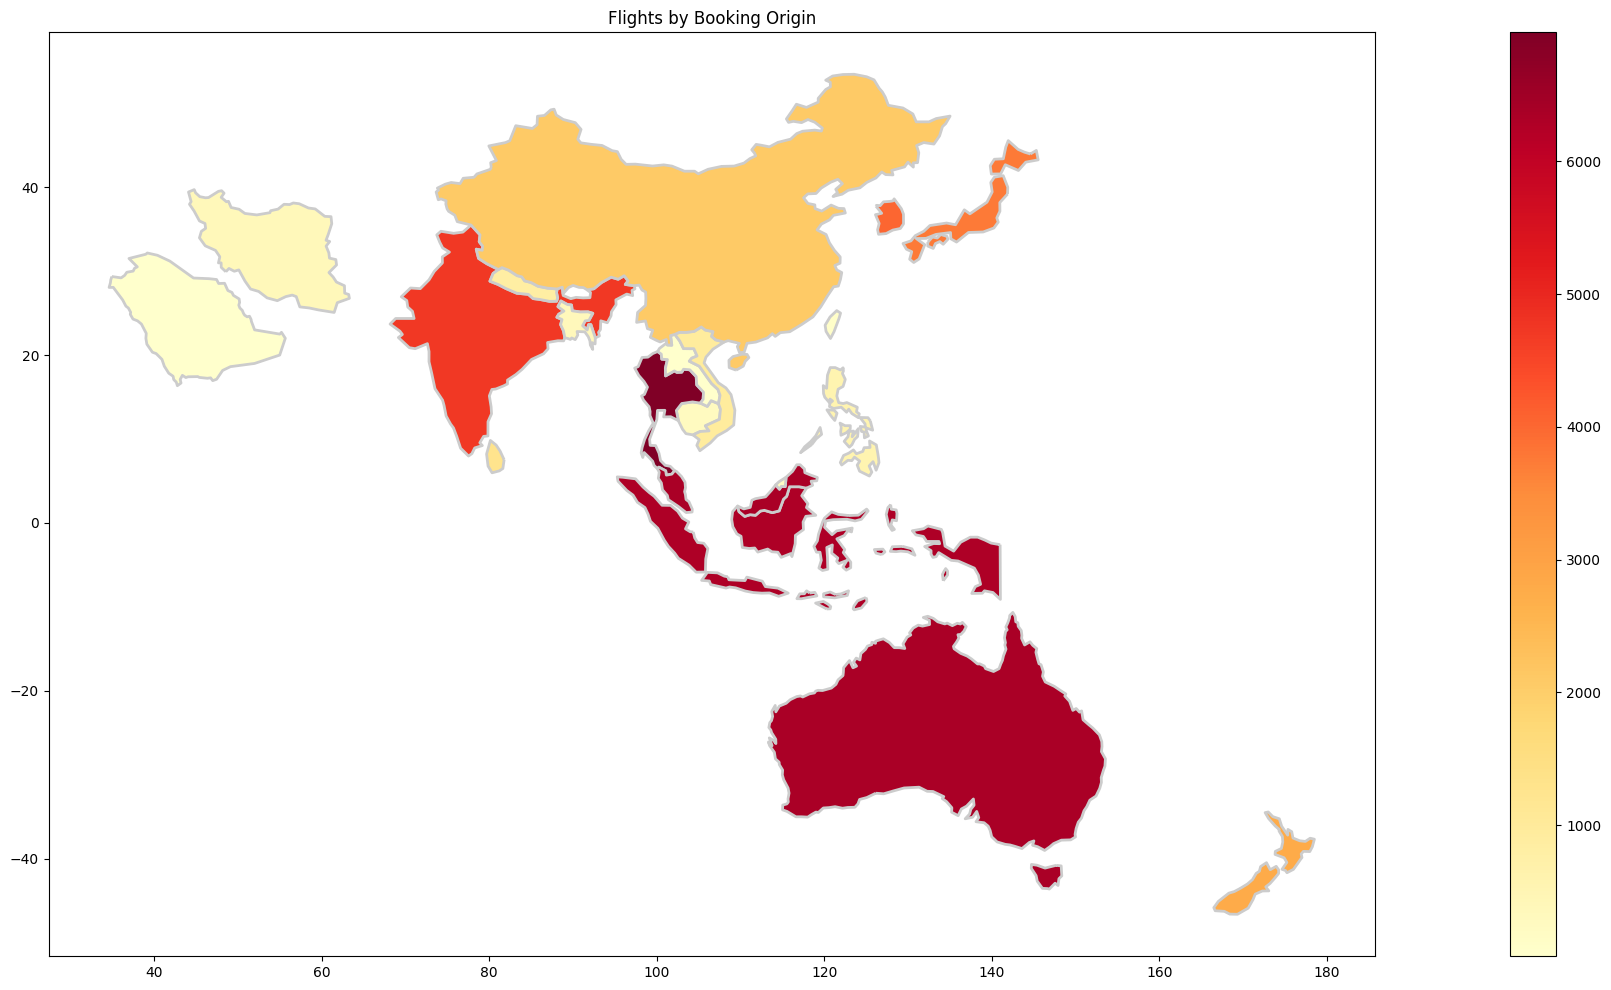

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_origin'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_origin', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Origin')

plt.show()

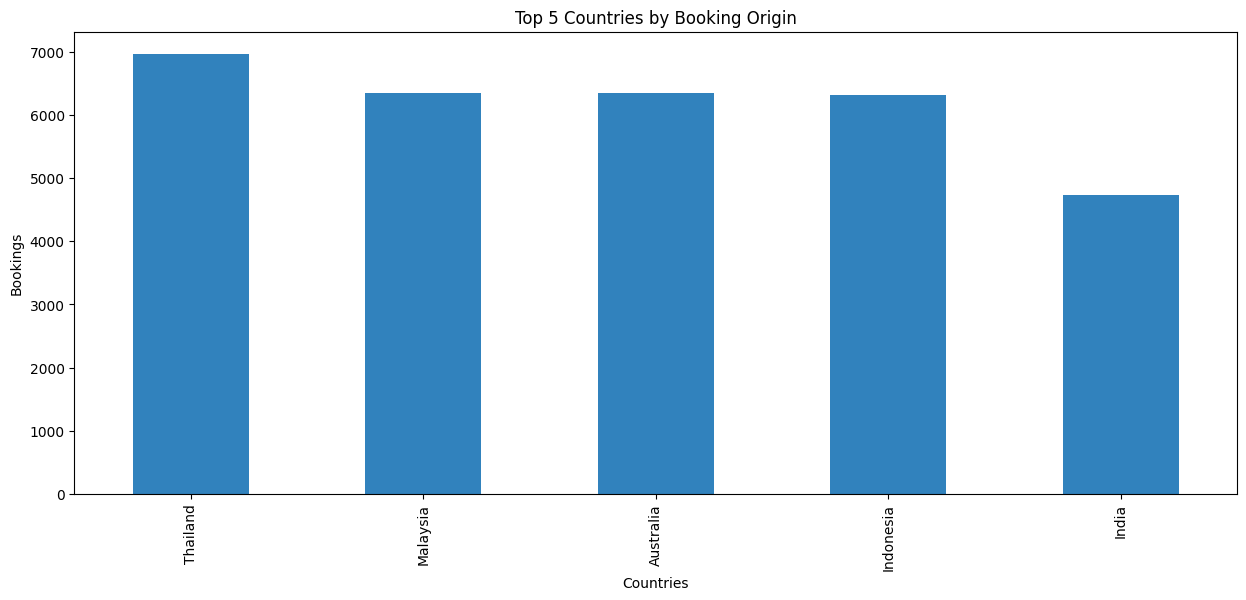

In [5]:
value_counts = df['booking_origin'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(15, 6))
value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 5 Countries by Booking Origin')

# Display the plot
plt.show()

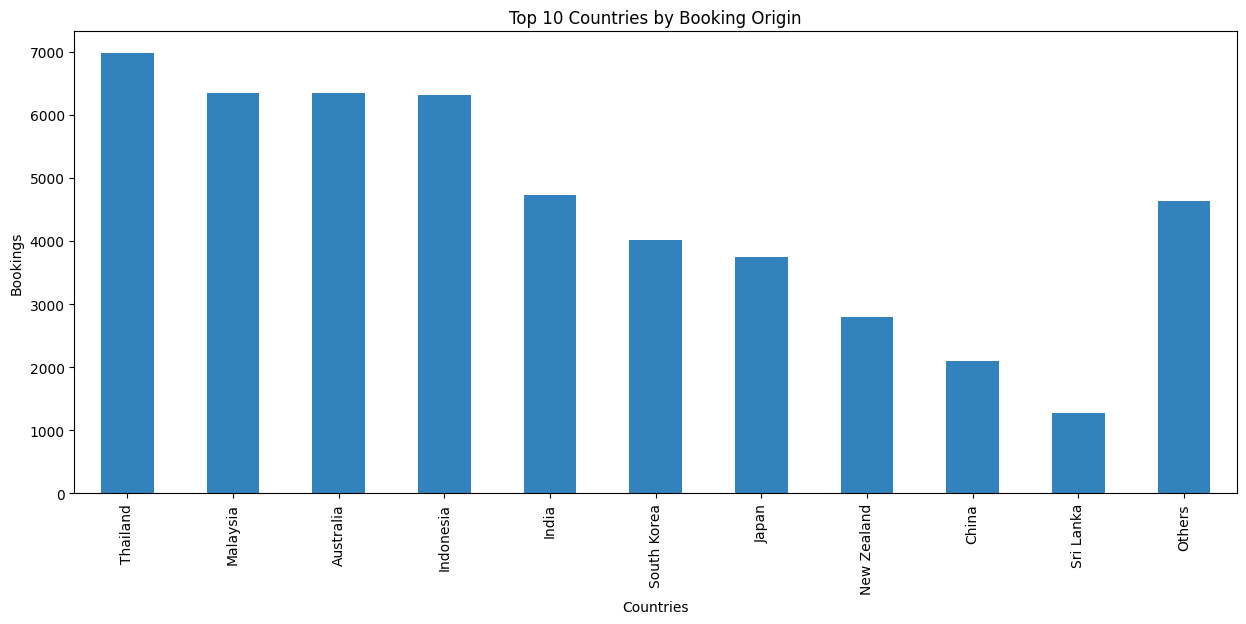

In [56]:
value_counts = df['booking_origin'].value_counts()

top_5_counts = value_counts.head(10)
other_count = value_counts[10:].sum()
new_value_counts = pd.concat([top_5_counts, pd.Series({'Others': other_count})])

fig, ax = plt.subplots(figsize=(15, 6))
new_value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Countries by Booking Origin')

plt.show()

# Booking Destination

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_18075/3880249623.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


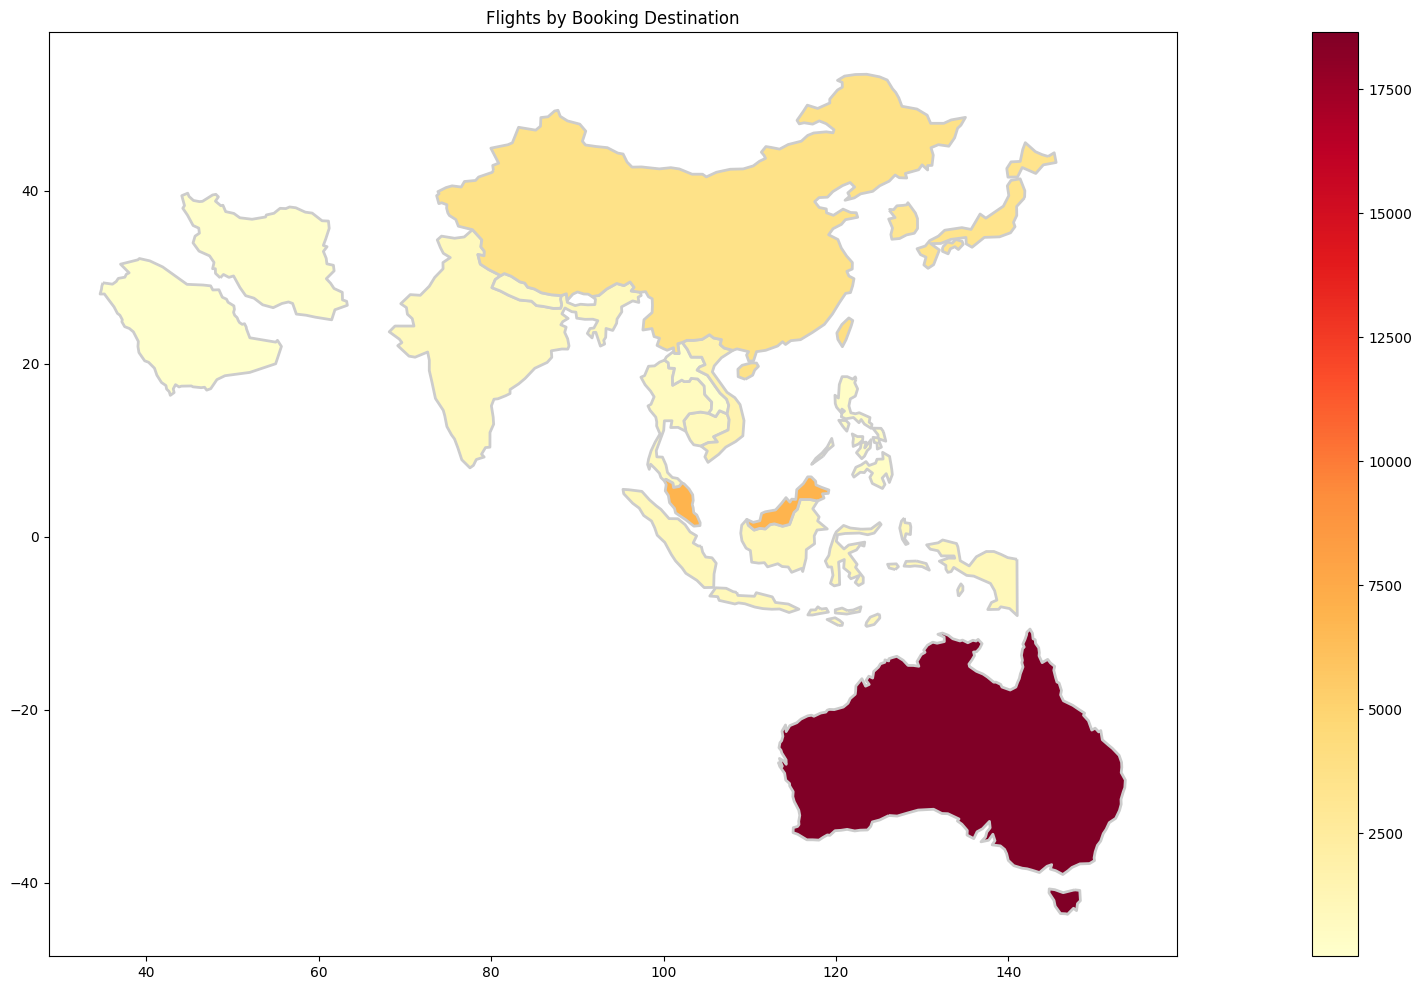

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_destination'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_destination', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Destination')

plt.show()

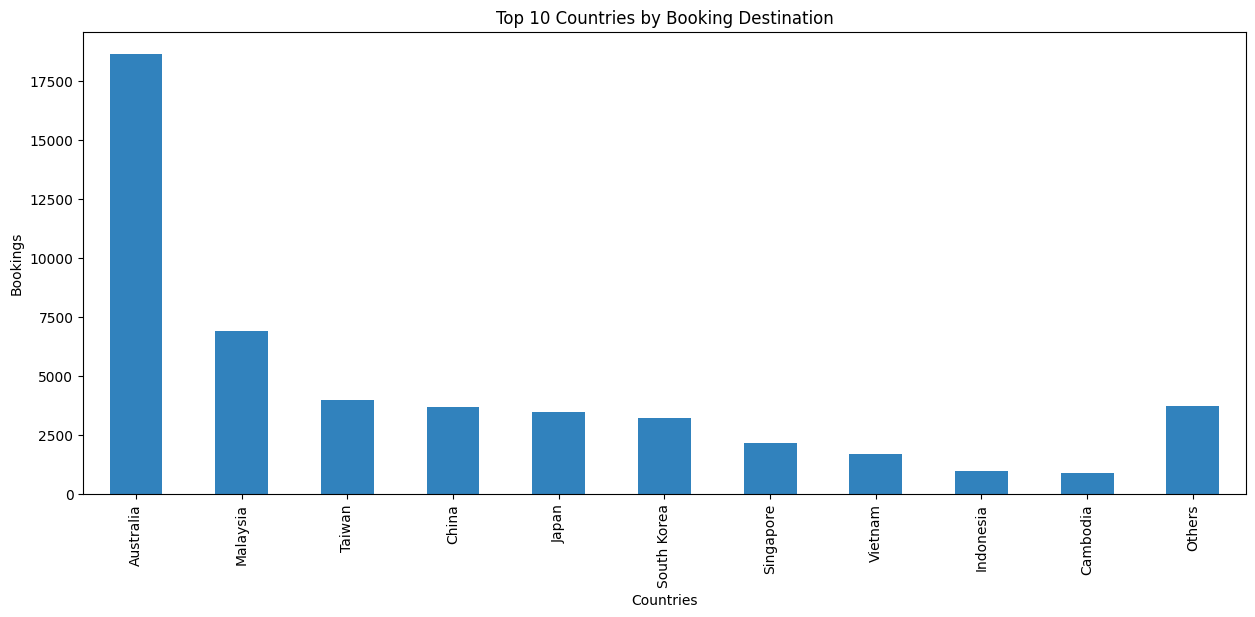

In [9]:
value_counts = df['booking_destination'].value_counts()

top_5_counts = value_counts.head(10)
other_count = value_counts[10:].sum()
new_value_counts = pd.concat([top_5_counts, pd.Series({'Others': other_count})])

fig, ax = plt.subplots(figsize=(15, 6))
new_value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Countries by Booking Destination')

plt.show()

# Routes

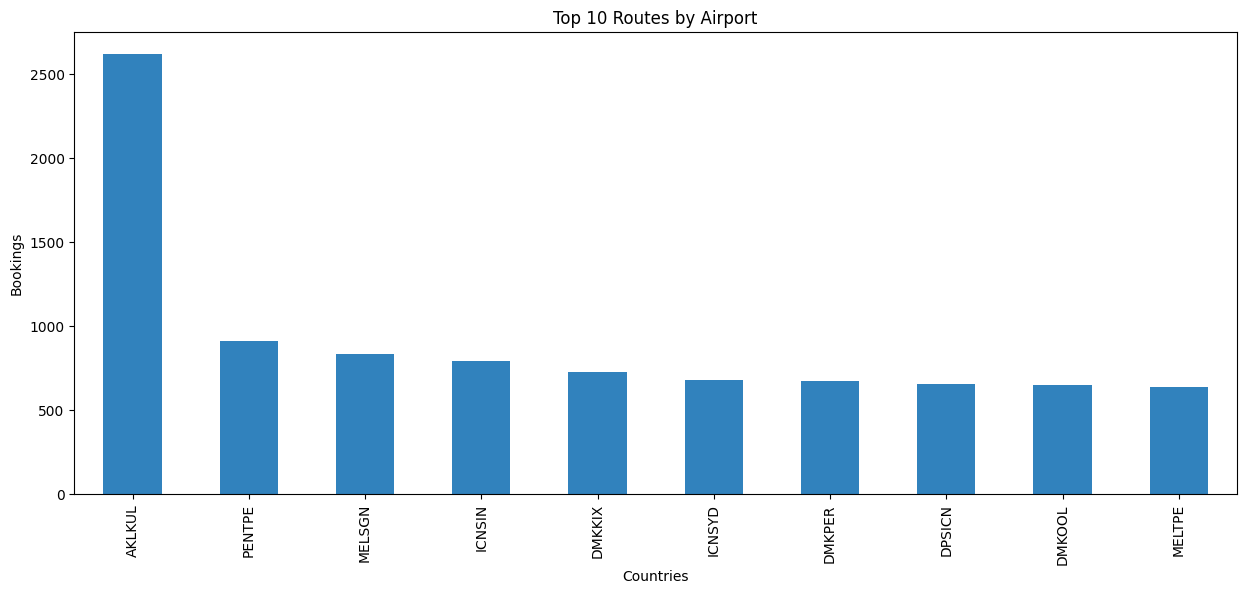

In [10]:
value_counts = df['route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Airport')

# Display the plot
plt.show()

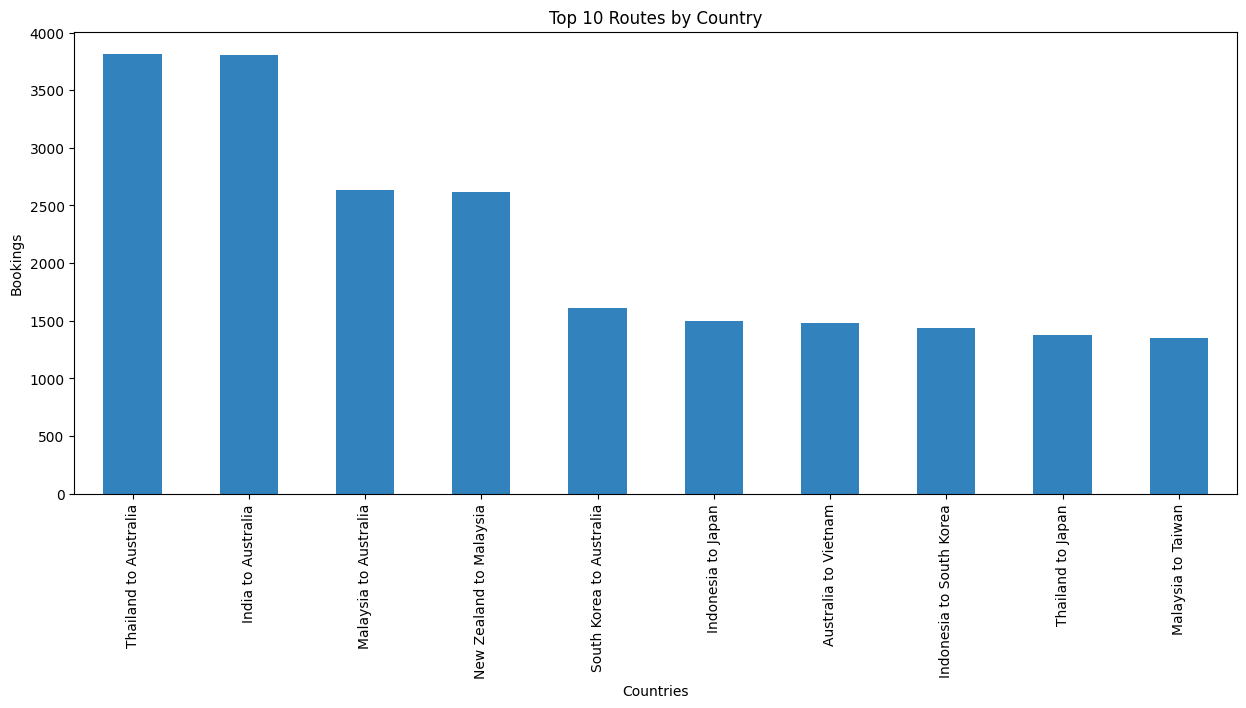

In [11]:
value_counts = df['country_route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Country')

# Display the plot
plt.show()

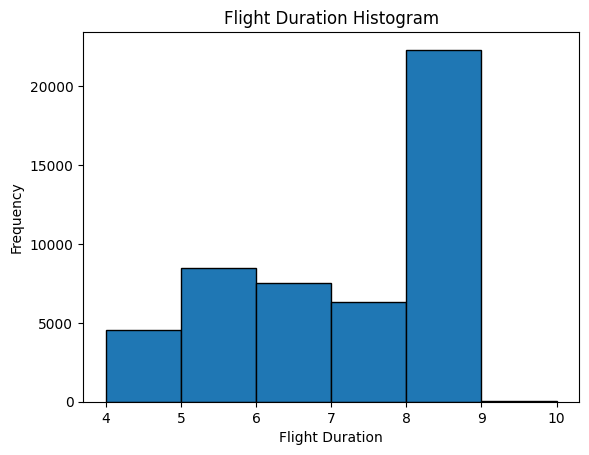

In [29]:
bin_edges = range(int(min(df['flight_duration'])), int(max(df['flight_duration']))+2)
plt.hist(df['flight_duration'], bins=bin_edges, edgecolor='black')

plt.xlabel('Flight Duration')
plt.ylabel('Frequency')
plt.title('Flight Duration Histogram')

# Display the histogram
plt.show()

# Additional Services

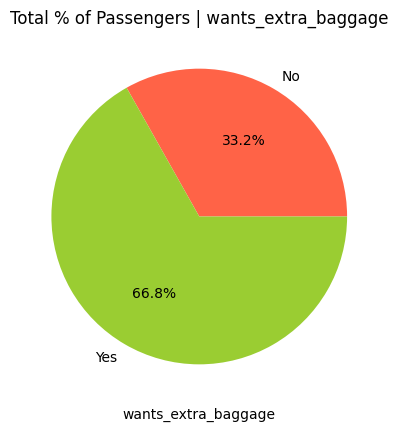

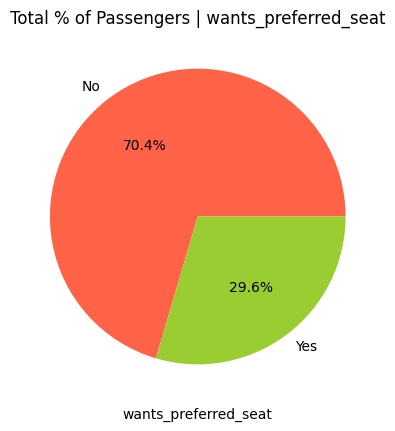

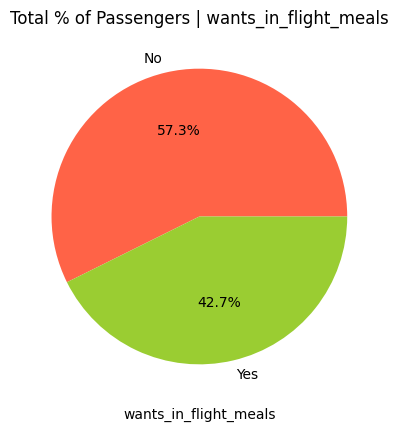

In [28]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for service in services :

    
    count = df[service].value_counts().sort_index()
    #count.plot(kind='pie')
    plt.pie(count, labels=["No","Yes"], autopct='%1.1f%%',colors=["tomato","yellowgreen"])

    plt.xlabel(service)
    plt.title(f"Total % of Passengers | {service}")
    plt.show()

## Wants In Flight Meals

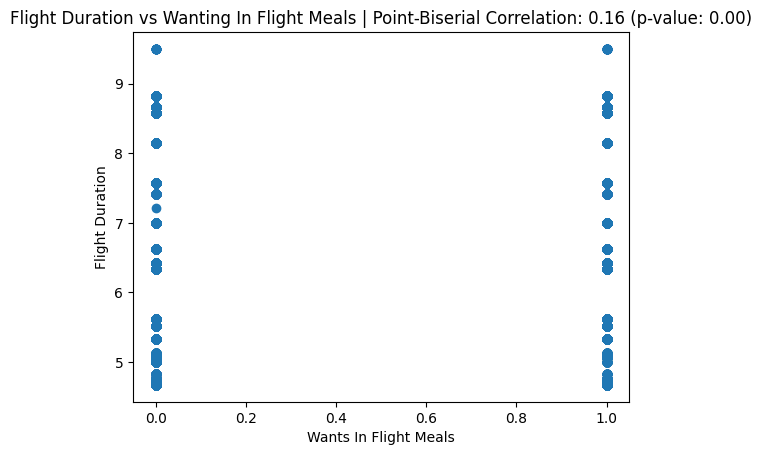

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(df['wants_in_flight_meals'], df['flight_duration'])


# Create a scatter plot of the data
plt.scatter(df['wants_in_flight_meals'], df['flight_duration'])

# Add labels and title
plt.xlabel('Wants In Flight Meals')
plt.ylabel('Flight Duration')
plt.title(f'Flight Duration vs Wanting In Flight Meals | Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

#weak correlation
#can also be explained bc the min flight length is 4 hrs, which is relatively long. it might have more correlation if we could compare to flights shorter in length (1-2 hrs)
#https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php

## Extra Baggage

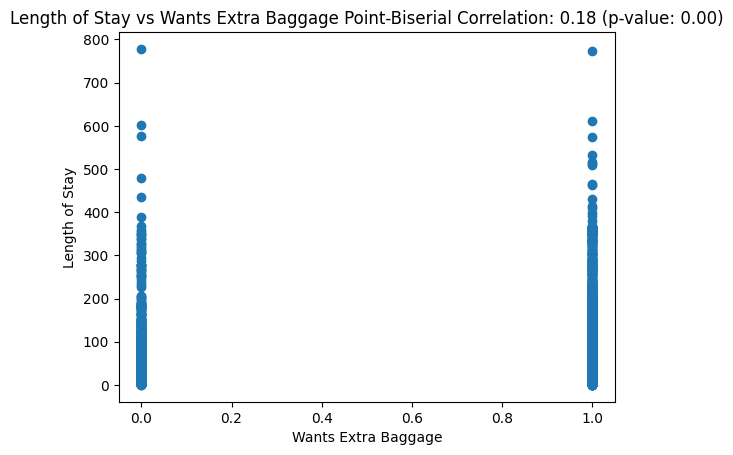

In [6]:
correlation_coefficient, p_value = stats.pointbiserialr(df['wants_extra_baggage'], df['length_of_stay'])

# Create a scatter plot of the data
plt.scatter(df['wants_extra_baggage'], df['length_of_stay'])

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Length of Stay vs Wants Extra Baggage Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

## Preferred Seat

Text(0.5, 1.0, 'Point-Biserial Correlation: 0.18 (p-value: 0.00)')

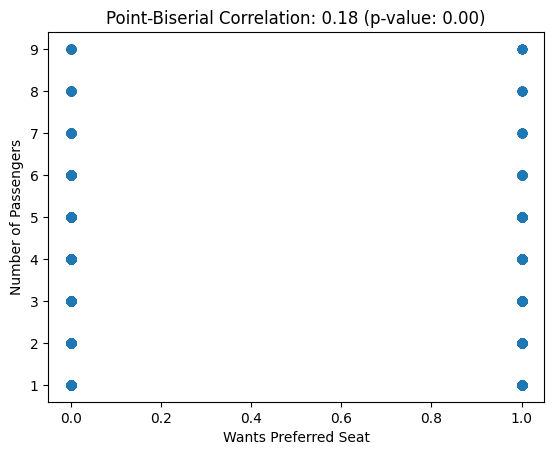

In [8]:
a = df['wants_preferred_seat']
b = df['num_passengers']

plt.scatter(a, b)

# Add labels and title
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Number of Passengers')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

#data is stacked on top of each other since num_passengers is in integers


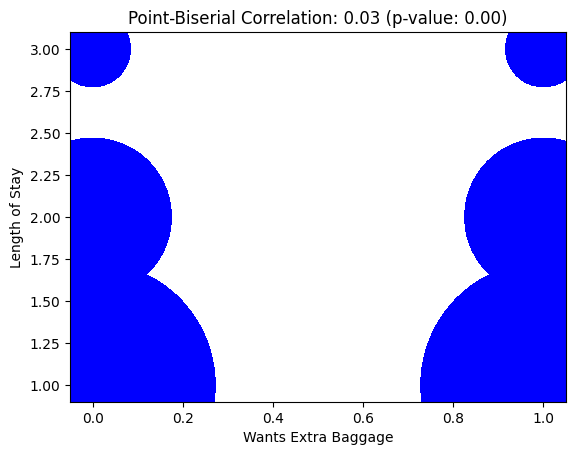

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Wants extra baggage vs length of stay (outliers removed)
a = df['wants_preferred_seat']
b = df['num_passengers']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)

# Define the outlier threshold (e.g., using z-scores)
z_score_threshold = 2

# Calculate the z-scores for the continuous variable
z_scores = (b - np.mean(b)) / np.std(b)

# Filter outliers based on the z-score threshold
filtered_a = a[abs(z_scores) <= z_score_threshold]
filtered_b = b[abs(z_scores) <= z_score_threshold]

# Calculate the concentration of points
concentration = filtered_b.value_counts()  # Assuming 'length_of_stay' is a discrete variable
max_concentration = concentration.max()
sizes = concentration[filtered_b].values  # Use concentration values as sizes

# Create a bubble plot of the filtered data
plt.scatter(filtered_a, filtered_b, s=sizes, c='blue', alpha=0.4)

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()


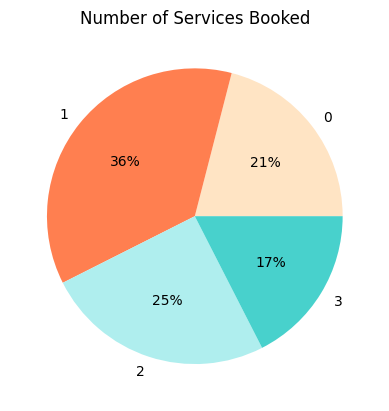

In [54]:
# By Number of Services Booked
df['total_services'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

value_counts = df['total_services'].value_counts().reset_index()

value_counts_sorted = value_counts.sort_values('index')

plt.pie(value_counts_sorted['total_services'], labels=value_counts_sorted['index'], autopct='%1.0f%%', colors = ['bisque','coral','paleturquoise','mediumturquoise'])
plt.title('Number of Services Booked')


plt.show()

# Passengers are more likely to purchase 2 or more services
# Recommendation: Bundle packages at a slight discount to incentivize people to book more services
# Next question: Which services?

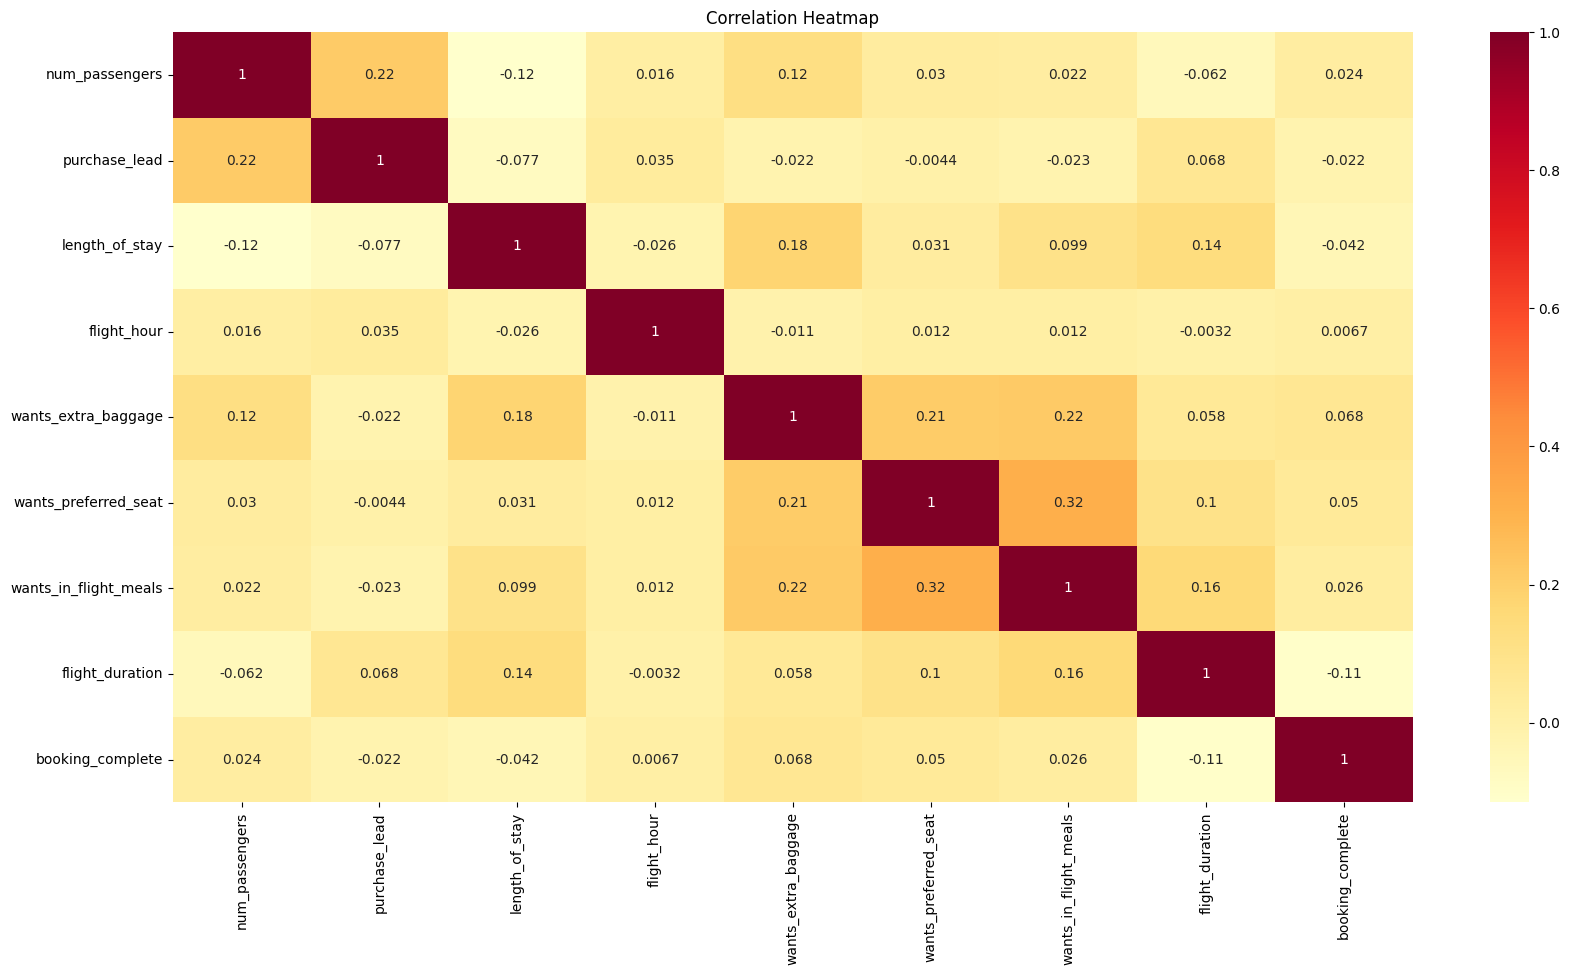

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

# Correlation between all three factors (esp flight meals and preferred seat (0.32))

In [51]:
def calculate_correlation(df, service1, service2):
    correlation = df[service1].corr(df[service2])
    return(f"Correlation between {service1} and {service2}: {correlation}")



'Correlation between wants_extra_baggage and wants_in_flight_meals: 0.21680998884144784'

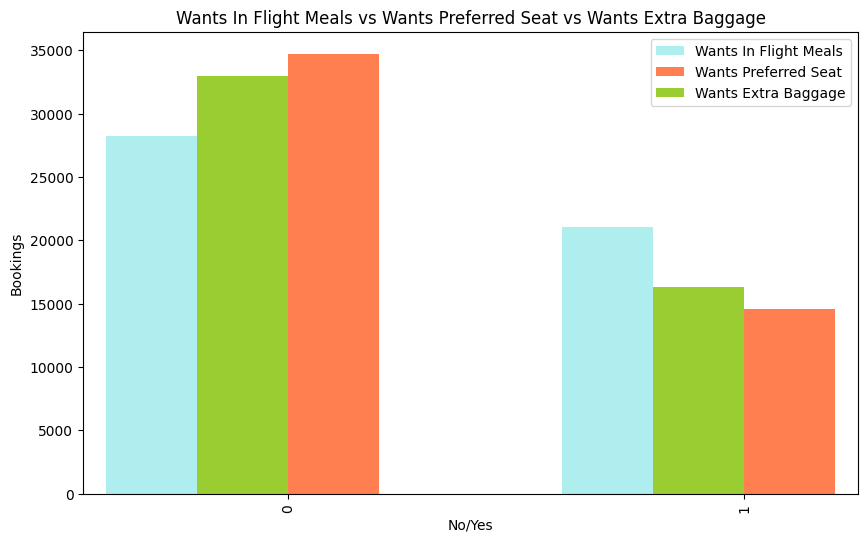

In [50]:
import matplotlib.pyplot as plt

seat = df['wants_preferred_seat'].value_counts()
meals = df['wants_in_flight_meals'].value_counts()
baggage = df['wants_extra_baggage'].value_counts()

# Reduce the bar width to lessen the space between bars
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

meals.plot.bar(position=2, width=bar_width, color='paleturquoise', label='Wants In Flight Meals', ax=ax)

# Plot the second variable's bars next to the first bars
seat.plot.bar(position=0, width=bar_width, color='coral', label='Wants Preferred Seat', ax=ax)

baggage.plot.bar(position=1, width=bar_width, color='yellowgreen', label='Wants Extra Baggage', ax=ax)

# Customize the plot
plt.xlabel('No/Yes')
plt.ylabel('Bookings')
plt.title('Wants In Flight Meals vs Wants Preferred Seat vs Wants Extra Baggage')
plt.xticks(range(len(meals)), meals.index)

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [45]:
def calculate_correlation(df, service1, service2):
    correlation = df[service1].corr(df[service2])
    return(f"Correlation between {service1} and {service2}: {correlation}")

calculate_correlation(df,'wants_extra_baggage','wants_in_flight_meals')



'Correlation between wants_extra_baggage and wants_in_flight_meals: 0.21680998884144784'

In [46]:
calculate_correlation(df,'wants_preferred_seat','wants_in_flight_meals')

'Correlation between wants_preferred_seat and wants_in_flight_meals: 0.31517084901330755'